In [1]:
import tensorflow as tf 
import keras 
import warnings
warnings.simplefilter('ignore')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2)

In [4]:
training_set = train_datagen.flow_from_directory('training_dataset',
                                                target_size = (64,64),
                                                class_mode = 'binary')

Found 8048 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'cats-20250710T083953Z-1-001': 0, 'dogs-20250710T084251Z-1-001': 1}

In [6]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory('testing_dataset',
                                           target_size = (64,64),
                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**Modelling - Convolution Neural Network**

**Initialising the CNN**

In [7]:
from keras.models import Sequential
classifier = Sequential()

**Convolution**

In [8]:
from keras.layers import Conv2D
classifier.add(Conv2D(input_shape = [64,64,3],
                     filters = 32,kernel_size = 3,activation = 'relu'))

**Max Pooling**

In [9]:
from keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size = 2,strides = 2))

**Flattening**

In [10]:
from keras.layers import Flatten
classifier.add(Flatten())

**Full Connection**

In [11]:
from keras.layers import Dense

classifier.add(Dense(units = 128,activation = 'relu'))

classifier.add(Dense(units = 1,activation = 'sigmoid'))

**Training the CNN Model with train data & Testing the model with test data**

In [12]:
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

Epoch 1/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.7725 - loss: 0.4638 - val_accuracy: 0.7590 - val_loss: 0.5117
Epoch 2/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.7921 - loss: 0.4498 - val_accuracy: 0.7055 - val_loss: 0.6354
Epoch 3/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 57s 227ms/step - accuracy: 0.7784 - loss: 0.4658 - val_accuracy: 0.7615 - val_loss: 0.5376
Epoch 4/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 55s 220ms/step - accuracy: 0.7978 - loss: 0.4302 - val_accuracy: 0.7520 - val_loss: 0.5612
Epoch 5/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 56s 222ms/step - accuracy: 0.8095 - loss: 0.4048 - val_accuracy: 0.7550 - val_loss: 0.5392
Epoch 6/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 56s 223ms/step - accuracy: 0.8209 - loss: 0.4008 - val_accuracy: 0.7560 - val_loss: 0.5806
Epoch 7/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 54s 213ms/step - accuracy: 0.8378 - loss: 0.3695 - val_accuracy: 0.7500 - val_loss: 0.5674
Epoch 8/25
252/252 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.8373 - loss: 0

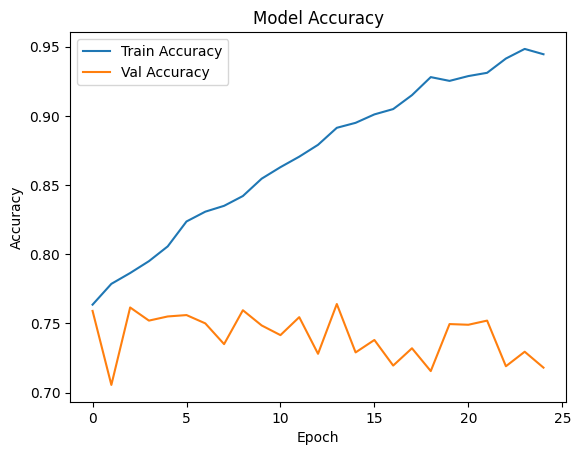

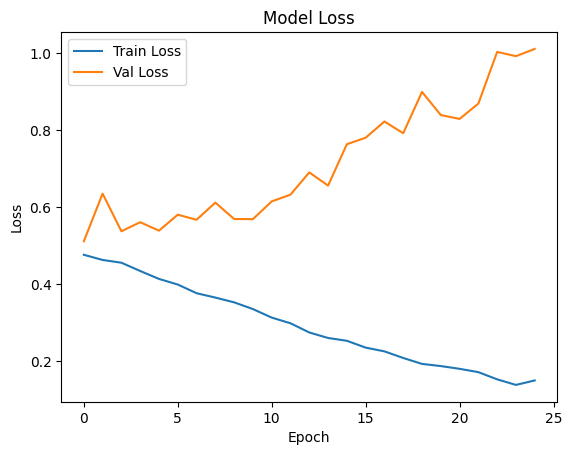

In [17]:
import matplotlib.pyplot as plt

# Assuming you stored history during training
history =classifier.fit(x=training_set,validation_data=test_set,epochs = 25)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


**Evalution**

In [14]:
import numpy as np 
from PIL import Image

In [15]:
# Load the data 
test_image = Image.open(r'C:\Users\sahur\Downloads\DATASET OF DATA SCIENCE SRK SIR\CNN DATASET\cat_or_dog_2.jpg')

# Data preprocessing 
test_image = test_image.resize((64,64))
test_image = np.array(test_image)
test_image = np.expand_dims(test_image,axis = 0)

# prediction 
result = classifier.predict(test_image)

# Evalution 
if result-[0][0]==1 : 
    print('Dog')
else:
    print('Cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Dog
